# Objective: Our goal is to develop an accurate model that can be used to predict sales on the basis of the three media budgets. 

# Import Dependencies

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
import numpy as np

In [4]:
import pandas as pd
import math

In [5]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


# Loaded Dataset

## Description:
- TV advertisment is spent in thousands of Canadian dollars (K)
- Radio advertisment is spent in thousands of Canadian dollars (K)
- Newspaper advertisment is spent in thousands of Canadian dollars (K)
- Sales revenue is in thousands of Canadian dollars (K)

## Dropping "Unnamed:0"
- After consulting with client, we discovered that units are in thousands of dollars and the numbers under the medias represented investment in advertisement and total sales.
- According to the client, "Unnamed:0" was an extra feature that has no impact on the sales. After consluting the the client, we ahve both agreed that there is no need for the feature and we can drop it. 

In [6]:
df = pd.read_csv('Advertising.csv')
df = df.drop(["Unnamed: 0"], axis=1)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
len(df)

200

In [8]:
df.columns
for items in df.columns:
    print (items)

TV
Radio
Newspaper
Sales


## Scatter Plot:

- A scatter plot is used to visualize the relationship between two the variables given, helping identify patterns, trends, and correlations.

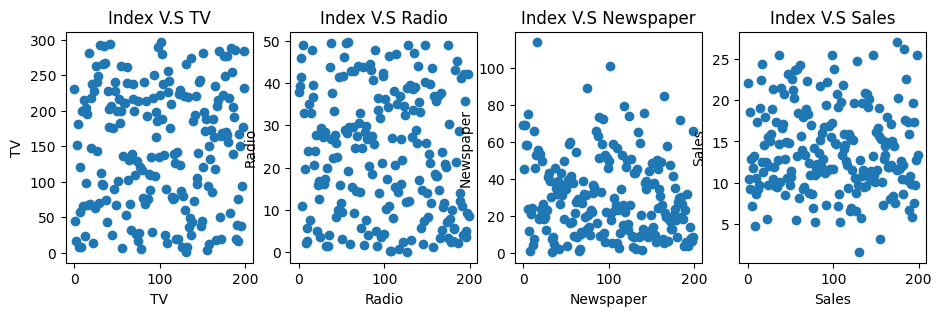

In [102]:
plt.figure(figsize=(14,3))

for i, feature in enumerate(df.columns):
    plt.subplot(1,5,(i+1))
    plt.scatter(df.index,df[feature])
    plt.ylabel(f'{feature}')
    plt.xlabel(f'{feature}')
    plt.title(f'Index V.S {feature}')
    
plt.show()

In [103]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [104]:
df['TV'].sum()

np.float64(29408.5)

# Manual alculation of mean, median and mode for all medias:


In [105]:
column_values=df['TV'].tolist()

min_value=column_values[0]
for value in column_values:
    if value<min_value:
        min_value=value

max_value=column_values[0]
for value in column_values:
    if value>max_value:
        max_value=value

added=0
count=0
for value in column_values:
    added=added+value
    count += 1
mean=added/count
print("mean",mean)


print("min:", min_value)
print("max:", max_value)


mean 147.0425
min: 0.7
max: 296.4


In [106]:
column_values=df['Radio'].tolist()

min_value=column_values[0]
for value in column_values:
    if value<min_value:
        min_value=value

max_value=column_values[0]
for value in column_values:
    if value>max_value:
        max_value=value

added=0
count=0
for value in column_values:
    added=added+value
    count += 1
mean=added/count
print("mean",mean)


print("min:", min_value)
print("max:", max_value)


mean 23.264000000000024
min: 0.0
max: 49.6


In [107]:
column_values=df['Newspaper'].tolist()

min_value=column_values[0]
for value in column_values:
    if value<min_value:
        min_value=value

max_value=column_values[0]
for value in column_values:
    if value>max_value:
        max_value=value

added=0
count=0
for value in column_values:
    added=added+value
    count += 1
mean=added/count
print("mean",mean)


print("min:", min_value)
print("max:", max_value)


mean 30.553999999999995
min: 0.3
max: 114.0


In [108]:
column_values=df['Sales'].tolist()

min_value=column_values[0]
for value in column_values:
    if value<min_value:
        min_value=value

max_value=column_values[0]
for value in column_values:
    if value>max_value:
        max_value=value

added=0
count=0
for value in column_values:
    added=added+value
    count += 1
value=added/count
print("mean",value)


print("min:", min_value)
print("max:", max_value)


mean 14.022500000000003
min: 1.6
max: 27.0


## Histogram used to visualize the distribution of the TV, Radio, Newspaper and Saless by displaying the frequency of data points within specified ranges.

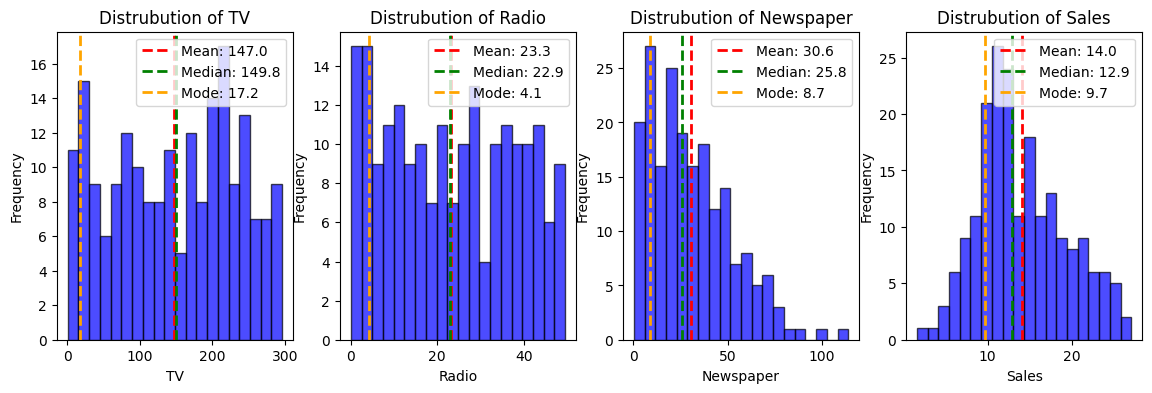

In [109]:
plt.figure(figsize=(14,4))

for i, feature in enumerate(df.columns):
    plt.subplot(1,4,(i+1))
    plt.hist(df[feature], bins=20,color='blue', edgecolor='black',alpha=0.7)
    feature_mean=df[feature].mean()
    feature_median=df[feature].median()
    feature_mode=df[feature].mode()[0]
    plt.axvline(feature_mean, color='red',linestyle='dashed',linewidth=2, label=f'Mean: {feature_mean:.1f}')
    plt.axvline(feature_median, color='green',linestyle='dashed',linewidth=2, label=f'Median: {feature_median:.1f}')
    plt.axvline(feature_mode, color='orange',linestyle='dashed',linewidth=2, label=f'Mode: {feature_mode:.1f}')
    plt.xlabel(f'{feature}')
    plt.ylabel('Frequency')
    plt.title(f'Distrubution of {feature}')
    plt.legend()
        
plt.show()

**Observations:**
- The data for TV shows a slight rightward skew. The mean and median are quite close, indicating a mostly symmetric distribution with a subtle shift toward higher values. The mode is a bit lower, reinforcing this mild skew.

- The distribution for Radio seems almost even, with a small leftward tilt. The mean, median, and mode are similar, pointing to a nearly symmetrical dataset with little skew.

- The dataset for Newspaper leans slightly to the right. The mean is higher than both the median and mode, suggesting that there are some unusually high values influencing the average.

- The distribution of Sales also has a gentle rightward skew, where the mean exceeds the median, and the mode is slightly lower than both. This hints at a few higher values that might be affecting the overall distribution.

These observations help in choosing the right modeling techniques and determining whether adjustments like normalization or transformation are needed to accurately represent the data.

## IQR Denoise:

- IQR denoise helped us remove and recognize outliers to reduce the influence the values of outliers have on the overall data.

**Steps:**
1. Calculated the 1st quartile (Q1) and 3rd quartile (Q3) of the `Newspaper` column.
2. Computed the IQR:  
   ```
   IQR = Q3 - Q1 = 93.625 - 32.35 = 61.275
   ```
3. Defined the lower and upper bounds:
   ```
   Lower Bound = Q1 - 1.5 × IQR = -35.775
   Upper Bound = Q3 + 1.5 × IQR = 93.625
   ```
4. Filtered the dataset to keep only those records where the `Newspaper` value is less than or equal to the upper bound.

- After this process, the the number of data sets was reduced to 198 because we were able to remove the outliers. 

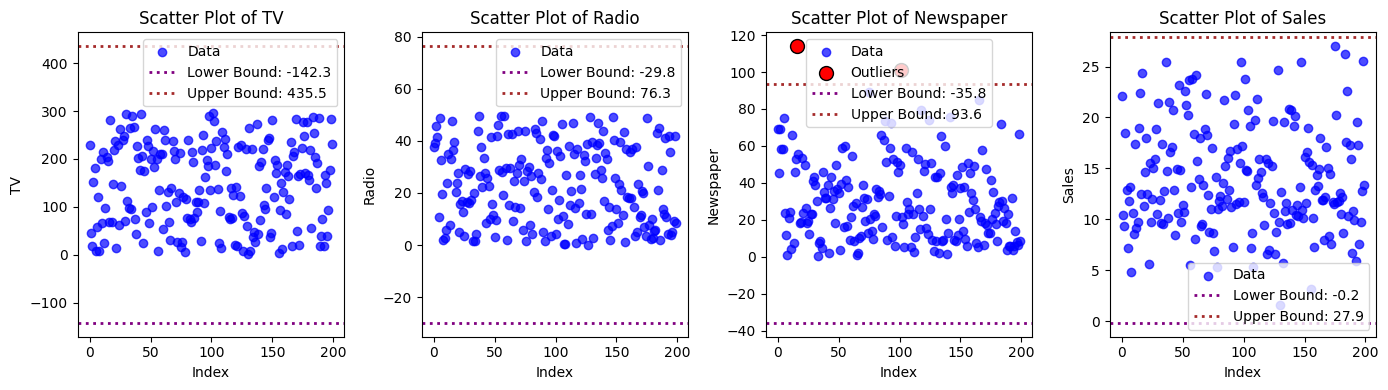

In [110]:
plt.figure(figsize=(14, 4))

for i, feature in enumerate(df.columns):
    # Calculate IQR-based noise (outliers)
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]
    
    # Create subplot
    plt.subplot(1, 4, i + 1)

    # Scatter plot for all data points
    plt.scatter(df.index, df[feature], color='blue', label='Data', alpha=0.7)

    # Highlight outliers in red
    if not outliers.empty:
        plt.scatter(outliers.index, outliers, color='red', edgecolors='black', s=100, label='Outliers')

    # Plot IQR bounds
    plt.axhline(lower_bound, color='purple', linestyle='dotted', linewidth=2, label=f'Lower Bound: {lower_bound:.1f}')
    plt.axhline(upper_bound, color='brown', linestyle='dotted', linewidth=2, label=f'Upper Bound: {upper_bound:.1f}')
    
    # Labels and title
    plt.xlabel("Index")
    plt.ylabel(f"{feature}")
    plt.title(f"Scatter Plot of {feature}")
    plt.legend()

# Show scatter plots
plt.tight_layout()
plt.show()

# Reason for Dispersion:
- Dispersion is important because it measures the spread or variability of data, helping to understand how much individual data points differ from the mean, which provides insights into consistency, risk, and variability in patterns or outcomes.

## Variance Analysis:

- The variance of each feature was computed to assess the degree of spread and variation within the dataset. Variance indicates how much individual values differ from the mean, helping to identify features with greater dispersion.

In [20]:
column_values=df['TV'].tolist()
added=0
count=0
for value in column_values:
    added=added+value
    count += 1
mean=added/count
print(mean)
    
print(count)
sum = 0
for values in column_values:
    values=(values-mean)**2
    sum=sum+values
    value=sum/(count)
print (value)


147.0425
200
7334.095143750006


In [21]:
column_values=df['Radio'].tolist()
added=0
count=0
for value in column_values:
    added=added+value
    count += 1
mean=added/count
print(mean)
    
print(count)
sum = 0
for values in column_values:
    values=(values-mean)**2
    sum=sum+values
    value=sum/(count)
print (value)

23.264000000000024
200
219.32560399999994


In [22]:
column_values=df['Newspaper'].tolist()
added=0
count=0
for value in column_values:
    added=added+value
    count += 1
mean=added/count
print(mean)
    
print(count)
sum = 0
for values in column_values:
    values=(values-mean)**2
    sum=sum+values
    value=sum/(count)
print (value)

30.553999999999995
200
471.9367840000003


In [23]:
column_values=df['Sales'].tolist()
added=0
count=0
for value in column_values:
    added=added+value
    count += 1
mean=added/count
print(mean)
    
print(count)
sum = 0
for values in column_values:
    values=(values-mean)**2
    sum=sum+values
    value=sum/(count)
print (value)

14.022500000000003
200
27.08574374999999


## Intepretation of Variance:

- TV exhibits the highest variance (7263.67), reflecting significant variation in advertising spend.

- Newspaper follows with the second highest variance, consistent with the earlier detection of outliers.

- Radio shows moderate variance.

- Sales has the lowest variance (26.86), suggesting a more consistent sales volume across observations.


The interpretation of variance is important as it reveals the degree of spread or variability in the data, helping to identify features with more or less dispersion from the mean.

## Standard Deviation:

- Standard Deviation was essentially just the variance but square rooted to make sure the value is brought back to its orginal units. 

In [24]:
column_values=df['TV'].tolist()
added=0
count=0
for value in column_values:
    added=added+value
    count += 1
mean=added/count
print(mean)
    
print(count)
sum = 0
for values in column_values:
    values=(values-mean)**2
    sum=sum+values
    value=math.sqrt(sum/(count-1))
print (value)

147.0425
200
85.8542363149081


In [25]:
column_values=df['Radio'].tolist()
added=0
count=0
for value in column_values:
    added=added+value
    count += 1
mean=added/count
print(mean)
    
print(count)
sum = 0
for values in column_values:
    values=(values-mean)**2
    sum=sum+values
    value=math.sqrt(sum/(count-1))
print (value)

23.264000000000024
200
14.846809176168723


In [26]:
column_values=df['Newspaper'].tolist()
added=0
count=0
for value in column_values:
    added=added+value
    count += 1
mean=added/count
print(mean)
    
print(count)
sum = 0
for values in column_values:
    values=(values-mean)**2
    sum=sum+values
    value=math.sqrt(sum/(count-1))
print (value)

30.553999999999995
200
21.778620838522833


In [27]:
column_values=df['Sales'].tolist()
added=0
count=0
for value in column_values:
    added=added+value
    count += 1
mean=added/count
print(mean)
    
print(count)
sum = 0
for values in column_values:
    values=(values-mean)**2
    sum=sum+values
    value=math.sqrt(sum/(count-1))
print (value)

14.022500000000003
200
5.217456565710477


In [28]:
df[df['Newspaper']>93.6]

,TV,Radio,Newspaper,Sales
16,67.8,36.6,114.0,12.5
101,296.4,36.3,100.9,23.8


In [29]:
df=df[df['Newspaper']<=93.6]

In [30]:
len(df)

198

In [31]:
tv_radio_correlation = df["TV"].corr(df["Radio"])
tv_sales_correlation = df["TV"].corr(df["Sales"])

print("Correlation between TV and Radio:", tv_radio_correlation)
print("Correlation between TV and Sales:", tv_sales_correlation)

Correlation between TV and Radio: 0.051978162396389686
Correlation between TV and Sales: 0.7791208573985774


In [32]:
tv_corr=df['TV'].corr(df['Sales'])
tv_corr

np.float64(0.7791208573985774)

In [33]:
tv_corr=df['Sales'].corr(df['TV'])
tv_corr

np.float64(0.7791208573985775)

In [34]:
radio_corr=df['Radio'].corr(df['Sales'])
radio_corr

np.float64(0.5767476834229015)

In [35]:
np_corr=df['Newspaper'].corr(df['Sales'])
np_corr

np.float64(0.21955467558031128)

## Standard Deviation Intepretation:
- TV again has the highest standard deviation, reinforcing the significant variability in advertising spend.

- Newspaper and Radio exhibit moderate standard deviations.

- Sales has the lowest standard deviation, indicating minimal variation and suggesting a more stable sales pattern.

Understanding standard deviation is crucial for assessing the consistency of feature values and plays a key role in determining whether normalization or standardization is needed during preprocessing.

# Linear regression:
- Linear regression was used to model the relationship between a "TV" and sales, enabling predictions and insights into the strength and direction of their relationships.

## By Hand:

In [37]:
X=df['TV']
Y=df['Sales']
x_mean=X.mean()
y_mean=Y.mean()

In [38]:
df['x_diff']=df['TV']-x_mean
df['y_diff']=df['Sales']-y_mean
df['mult']=df['x_diff']*df['y_diff']
df['x_diff_square']=df['x_diff']*df['x_diff']

In [39]:
B1=(df['mult'].sum())/(df['x_diff_square'].sum())
B0=y_mean-B1*x_mean
print(f'Calculated B1:{B1}')
print(f'Calculated B0:{B0}')

Calculated B1:0.047381029380386394
Calculated B0:7.030561456400218


## Using Graph:

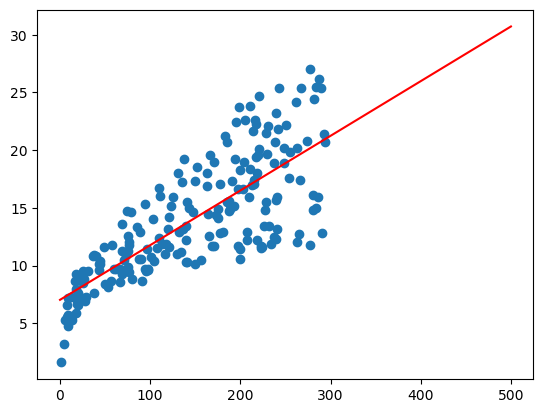

In [40]:
potential_spend=np.linspace(0,500,100)
predicted_sales=0.047381029380386394*potential_spend+7.030561456400218
plt.scatter(x='TV', y='Sales', data=df)
plt.plot(potential_spend, predicted_sales, color='red')
plt.show()

## Using Numpy:

In [66]:
X=df['TV']
y=df['Sales']

B1,B0=np.polyfit(X,y,deg=1)
print(f'Calculated B1 using NumPy: {B1}')
print(f'Calculated B0 using Numpy: {B0}')

Calculated B1 using NumPy: 0.04738102938038645
Calculated B0 using Numpy: 7.030561456400215


## Using sklearn:

In [67]:
X=df[['TV']]
y=df['Sales'].values

model=LinearRegression()
model.fit(X,y)

B1_sklearn=model.coef_[0]
B0_sklearn=model.intercept_

print(f'Calculated B1 using Scikit-Learn: {B1_sklearn:.4f}')
print(f'Calculated B0 using Scikit-Learn: {B0_sklearn:.4f}')

Calculated B1 using Scikit-Learn: 0.0474
Calculated B0 using Scikit-Learn: 7.0306


# Predict the sale when Tv spend is 170

In [68]:
spend=170
predict_sales=0.047381029380386394*spend+7.030561456400215
predict_sales

15.085336451065903

## RSE Observations:

- We use the standard residual standard error (RSE) to evaluate the accuracy of a regression model by measuring the average difference between observed and predicted values.
- Here RSE=3.2656
- This means that, on average, the predictions deviate by about 3.2656 units from actual sales.

In [69]:
X=df[['TV']]
y=df['Sales'].values
y_pred=model.predict(X)
mse=mean_squared_error(y,y_pred)

n=len(df['TV'])
RSE=np.sqrt(mse*(n/(n-2)))
print (f'Residual Standard Error (RSE) using Scikit-Learn: {RSE:.4f}')

Residual Standard Error (RSE) using Scikit-Learn: 3.2656


In [70]:
n=X.count()

## SE calculation:

In [71]:
# insert predicted value
df['y_hat'] = 0.047381029380386394*df['TV']+7.030561456400215

In [47]:
df.head()

,TV,Radio,Newspaper,Sales,x_diff,y_diff,mult,x_diff_square,y_hat
0,230.1,37.8,69.2,22.1,83.411616,8.119192,677.234920,6957.497711,17.932936
1,44.5,39.3,45.1,10.4,-102.188384,-3.580808,365.916991,10442.465792,9.139017
2,17.2,45.9,69.3,9.3,-129.488384,-4.680808,606.110273,16767.241549,7.845515
3,151.5,41.3,58.5,18.5,4.811616,4.519192,21.744617,23.151650,14.208787
4,180.8,10.8,58.4,12.9,34.111616,-1.080808,-36.868110,1163.602357,15.597052


# SE_beta 0:

In [72]:
n=df['Sales']
count=df['Sales'].count()
s=(n-df['y_hat'])**2
sum_s=s.sum()
divide=sum_s/(count-2)
final=math.sqrt(divide)
print(final)

3.265595798298984


In [73]:
X=df[['TV']]
x_mean=X.mean()

n=X.count()

a=1/n
b=x_mean**2 
c=(X-x_mean)**2

sum_dsq =c.sum()

se_beta_zero=(final)*math.sqrt(a+(b/sum_dsq))
print (se_beta_zero)


<ipython-input-73-653f4465b842>:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  se_beta_zero=(final)*math.sqrt(a+(b/sum_dsq))


0.46196152910484983


# Beta 1

In [74]:
X=df[['TV']]
x_mean=X.mean()
c=(X-x_mean)**2
e=c.sum()
apple=math.sqrt(e)
se_beta_one=final/apple
print (se_beta_one)

<ipython-input-74-915624bf11f5>:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  apple=math.sqrt(e)


0.0027230254779367466


## Observations for Standard Error:
- We use standard error to measure the precision of a sample estimate, indicating how much the sample mean is expected to vary from the true population mean
- In this case, coefficient of TVs sold suggests that for every additional TV sold, sales increase by approximately 0.002723 units 

## Hypothesis test:

We use a t-test to determine if there is a statistically significant difference between the means of two groups.

- **t-statistic for β₁** ≈ 17.40  
- **t-statistic for β₀** ≈ 15.22  

Both values are considerably high, providing strong evidence to reject the null hypothesis. 

In [75]:
t_1=B1/se_beta_one
print(t_1)

17.400141777699176


In [76]:
t_0=B0/se_beta_zero
print(t_0)


15.218932775686852


## R Square

- An R-squared value of 0.6070 means that approximately 60.7% of the variation of Sales can be explained by investment of Tv Advertisment in the model. The higher the R-squared, the better the model fits the data, though it doesn't guarantee causality.x

In [61]:
RSS=np.sum((df['Sales']-y_pred)**2)
TSS=np.sum((df['Sales']-np.mean(df['Sales']))**2)
R2=1-(RSS/TSS)
print(f'R-squared (R2):{R2:.4f}')

R-squared (R2):0.6070


## Gradient Descent:


- We use gradient descent over OLS when dealing with large datasets or complex models, as it is more computationally efficient and can handle high-dimensional or non-linear relationships.

In [9]:
# Extract features and target
X_raw = df["TV"].values  # Keep original for later conversion
y = df["Sales"].values

# Standardize X
X = (X_raw - np.mean(X_raw)) / np.std(X_raw)

# Initialize parameters
B0, B1 = 0, 0
alpha = 0.00001  # Lower learning rate for better convergence
epochs = 300000  # Increase iterations for stability
n = len(X)

cost_history = []  # Store cost function values

# Batch Gradient Descent Loop
for _ in range(epochs):
    y_pred = B0 + B1 * X
    error = y - y_pred  # Residual error

    # Compute gradients (WITH division by n)
    dB0 = -2 * np.sum(error) / n  # Gradient for B0
    dB1 = -2 * np.sum(error * X) / n  # Gradient for B1

    # Update parameters
    B0 -= alpha * dB0
    B1 -= alpha * dB1

    # Compute cost (Mean Squared Error, MSE)
    cost = np.mean(error ** 2)
    cost_history.append(cost)  # Store cost value

# Convert back to original scale
B1_original = B1 / np.std(X_raw)
B0_original = B0 - (B1_original * np.mean(X_raw))

# Print final coefficients
print(f"Optimized B0 (Intercept) using Gradient Descent (Original Scale): {B0_original:.4f}")
print(f"Optimized B1 (Slope) using Gradient Descent (Original Scale): {B1_original:.4f}")


Optimized B0 (Intercept) using Gradient Descent (Original Scale): 7.0152
Optimized B1 (Slope) using Gradient Descent (Original Scale): 0.0474


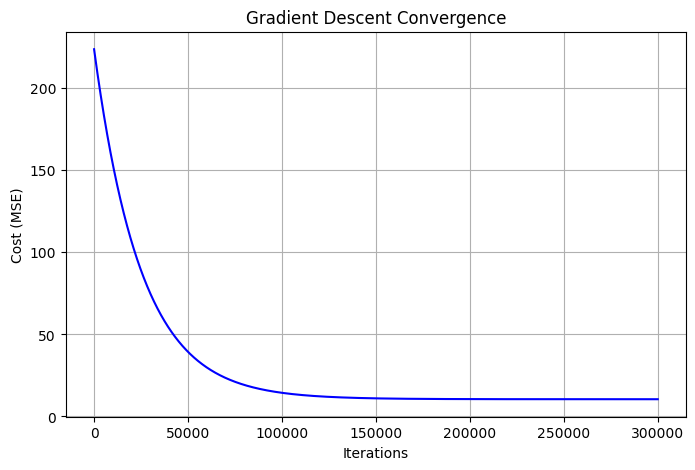

In [10]:
# Plot cost function over iterations
plt.figure(figsize=(8, 5))
plt.plot(range(epochs), cost_history, color='blue')
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Gradient Descent Convergence")
plt.grid(True)
plt.show()

## Table of Data:

In [84]:
import pandas as pd

# Creating a DataFrame
data = {
    " ": ["Intercept", "TV's sold"],
  "Coefficient": [B0, B1],
    "Standard Error": [se_beta_zero, se_beta_one],
    "t-statistic":[t_0,t_1],
}

df_showcase = pd.DataFrame(data)

display(df_showcase)

,,Coefficient,Standard Error,t-statistic
0,Intercept,7.030561,0.461962,15.218933
1,TV's sold,0.047381,0.002723,17.400142


In [85]:
import pandas as pd

# Create a dictionary
data = {'TV sales Quantity': ['R.S.E', 'R2'], 'Value': [3.2656,0.6070 ]}

# Convert dictionary into DataFrame
df_square_error = pd.DataFrame(data)

# Display table
df_square_error

,TV sales Quantity,Value
0,R.S.E,3.2656
1,R2,0.6070


## Further Intepretation

- roi is low because the client is spending lots on adveritisement but gaining little
- the more you spend on tv advertisement the more sales there will be because their correlaiton is close to +1
- coefficient of TVs sold suggests that for every additional TVs sold, sales increase by approximately 0.002723 units
- high t-statistic shows how TV and Sales have a strong relationship
- the more you spend on tv advertisement the more variance in your sales
- they should invest heavier on TV advertising to maximize sales
- spend less on newspaper because it does better without advertising
- we should invest on radio advertisment but be careful because TV's advertisment influences sales
- even though we invest more in Tv advertisment the sales will increase but not necessarily the profit